<a href="https://colab.research.google.com/github/Juanjo2712/Pokemon/blob/main/A_2_notebook_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
## Topics 4 - 5


This assignment is performed **in pairs** following the *Groups for Assignments* list.

To turn the assignment in, upload it to the task that has been created in moodle before midnight on Monday, November 14.

--- 



## 1. Introduction
<p>In the world of Pokémon academia, one name towers above any other – Professor Samuel Oak. While his colleague Professor Elm specializes in Pokémon evolution, Oak has dedicated his career to understanding the relationship between Pokémon and their human trainers. A former trainer himself, the professor has first-hand experience of how obstinate Pokémon can be – particularly when they hold legendary status.</p>
<p>For his latest research project, Professor Oak has decided to investigate the defining characteristics of legendary Pokémon to improve our understanding of their temperament. Hearing of our expertise in classification problems, he has enlisted us as the lead researchers.</p>
<p>Our journey begins at the professor's research lab in Pallet Town, Kanto. The first step is to open up the Pokédex, an encyclopaedic guide to 801 Pokémon from all seven generations.</p>
<p><img src="https://assets.datacamp.com/production/project_712/img/legendary_pokemon.jpg" alt="Legendary Pokémon"></p>
<p><em>Source: <a href="https://www.flickr.com/photos/bagogames/">bagogames</a> on Flickr</em></p>

These are the variables in the *Pokemon* dataset (*pokedex.csv*):

- **pokedex_number**: The entry number of the Pokemon in the National Pokedex
- **name**: The English name of the Pokemon
- **attack**: The Base Attack of the Pokemon
- **defense**: The Base Defense of the Pokemon
- **height_m**: Height of the Pokemon in metres
- **hp**: The Base HP of the Pokemon
- **percentage_male**: The percentage of the species that are male. Blank if the Pokemon is genderless.
- **sp_attack**: The Base Special Attack of the Pokemon
- **sp_defense**: The Base Special Defense of the Pokemon
- **speed**: The Base Speed of the Pokemon
- **type1**: The Primary Type of the Pokemon
- **weight_kg**: The Weight of the Pokemon in kilograms
- **generation**: The numbered generation which the Pokemon was first introduced
- **is_legendary**: Denotes if the Pokemon is legendary.


### Load your data and take a look at it

In [2]:
# YOUR CODE HERE
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
# !pip install dtreeviz
uploaded = files.upload()
Pokedex = pd.read_csv('pokedex.csv', sep=',', index_col=0)
display(Pokedex)

Saving pokedex.csv to pokedex (1).csv


,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Celesteela,101,103,9.2,97,NaN,107,101,61,steel,999.9,7,1
798,Kartana,181,131,0.3,59,NaN,59,31,109,grass,0.1,7,1
799,Guzzlord,101,53,5.5,223,NaN,97,53,43,dark,888.0,7,1


## 2. How many Pokémon are legendary? (0.25 points)
<p>After browsing the Pokédex, we can see several variables that could feasibly explain what makes a Pokémon legendary. We have a series of numerical fighter stats – <code>attack</code>, <code>defense</code>, <code>speed</code> and so on – as well as a categorization of Pokemon <code>type</code> (bug, dark, dragon, etc.). <code>is_legendary</code> is the binary classification variable we will eventually be predicting, tagged <code>1</code> if a Pokémon is legendary and <code>0</code> if it is not.</p>
<p>Before we explore these variables in any depth, let's find out how many Pokémon are legendary out of the 801 total.

In [3]:
# YOUR CODE HERE
N_legendary = Pokedex['is_legendary'].sum()
percentage = N_legendary/801

print('Number of legendary Pokèmon:',N_legendary,', Percentage of legendary Pokèmon:', round(percentage*100,2),'%')

Number of legendary Pokèmon: 70 , Percentage of legendary Pokèmon: 8.74 %


## 3. Legendary Pokémon by height and weight (0.5 points)
<p>We now know that there are 70 legendary Pokémon – a sizable minority at 8,74% of the population! Let's start to explore some of their distinguishing characteristics.</p>
<p>First of all, we'll plot the relationship between <code>height_m</code> and <code>weight_kg</code> for all 801 Pokémon, highlighting those that are classified as legendary. We'll also add conditional labels to the plot, which will only print a Pokémon's name if it is taller than 7.5m or heavier than 600kg.</p>

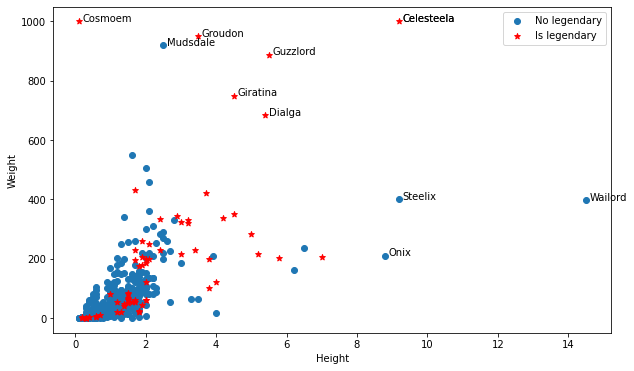

In [4]:
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(Pokedex['height_m'][Pokedex['is_legendary']==0],Pokedex['weight_kg'][Pokedex['is_legendary']==0],label='No legendary')
plt.scatter(Pokedex['height_m'][Pokedex['is_legendary']==1],Pokedex['weight_kg'][Pokedex['is_legendary']==1],marker='*',color='red', label='Is legendary')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

#Adding names
ind1 = Pokedex['height_m']>7.5 
ind2 = Pokedex['weight_kg']>600
x=Pokedex['height_m'][ind1]
y=Pokedex['weight_kg'][ind1]
l=Pokedex['name'][ind1]

for i,label in enumerate(l):
    plt.annotate(label, (x.values[i]+[0.1], y.values[i]))
    
x1=Pokedex['height_m'][ind2]
y1=Pokedex['weight_kg'][ind2]  
l1=Pokedex['name'][ind2]
for i,label in enumerate(l1):
    plt.annotate(label, (x1.values[i]+[0.1], y1.values[i]))

## 4. Legendary Pokémon by type (0.5 points)
<p>It seems that legendary Pokémon are generally large and heavy, but with many exceptions. For example, Onix (Gen 1), Steelix (Gen 2) and Wailord (Gen 3) are all extremely large, but none of them have legendary status. There must be other factors at play.</p>
<p>We will now look at the effect of a Pokémon's <code>type</code> on its legendary/non-legendary classification. There are 18 possible types, ranging from the common (Grass / Normal / Water) to the rare (Fairy / Flying / Ice). We will calculate the proportion of legendary Pokémon within each category, and then plot these proportions using a simple bar chart.</p>

Number of Pokèmon types: 18


'Proportion of Legendaries of each type'

[('grass', 0.05128205128205128),
 ('fire', 0.09615384615384616),
 ('water', 0.05263157894736842),
 ('bug', 0.041666666666666664),
 ('normal', 0.02857142857142857),
 ('poison', 0.0),
 ('electric', 0.1282051282051282),
 ('ground', 0.0625),
 ('fairy', 0.05555555555555555),
 ('fighting', 0.0),
 ('psychic', 0.32075471698113206),
 ('rock', 0.08888888888888889),
 ('ghost', 0.037037037037037035),
 ('ice', 0.08695652173913043),
 ('dragon', 0.25925925925925924),
 ('dark', 0.10344827586206896),
 ('steel', 0.25),
 ('flying', 0.3333333333333333)]

<BarContainer object of 18 artists>

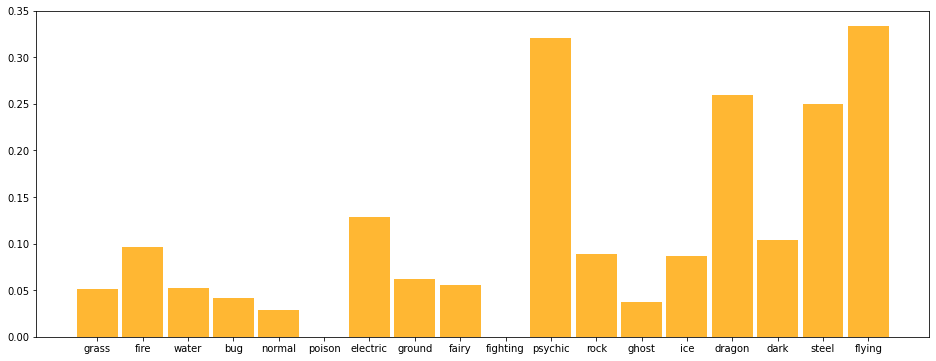

In [5]:
# YOUR CODE HERE
#Calculating the proportion of legendary Pokemon
print('Number of Pokèmon types:',len(Pokedex['type'].unique()))
Pokedex['type'].value_counts()


Percentage_list=[]
for i in Pokedex['type'].unique():
    ind = Pokedex['type']==i
    l1 = len(Pokedex[ind])
    l2 = len(Pokedex[ind & Pokedex['is_legendary']==1])
    Percentage_list.append((i,l2/l1))
    
display('Proportion of Legendaries of each type',Percentage_list)

#Plot
x=[]
y=[]
for i in Percentage_list:
    x.append(i[0])
    y.append(i[1])
plt.figure(figsize=(16,6))
plt.bar(x,y, align='center',width=0.9, color='orange',alpha=0.8)

## 5. Legendary Pokémon by fighter stats (0.5 points)
<p>There are clear differences between Pokémon types in their relation to legendary status. While more than 30% of flying and psychic Pokémon are legendary, there is no such thing as a legendary poison or fighting Pokémon!</p>
<p>Before fitting the model, we will consider the influence of a Pokémon's fighter stats (<code>attack</code>, <code>defense</code>, etc.) on its status. Rather than considering each stat in isolation, we will produce a boxplot for all of them simultaneously using the <code>facet_wrap()</code> function.</p>

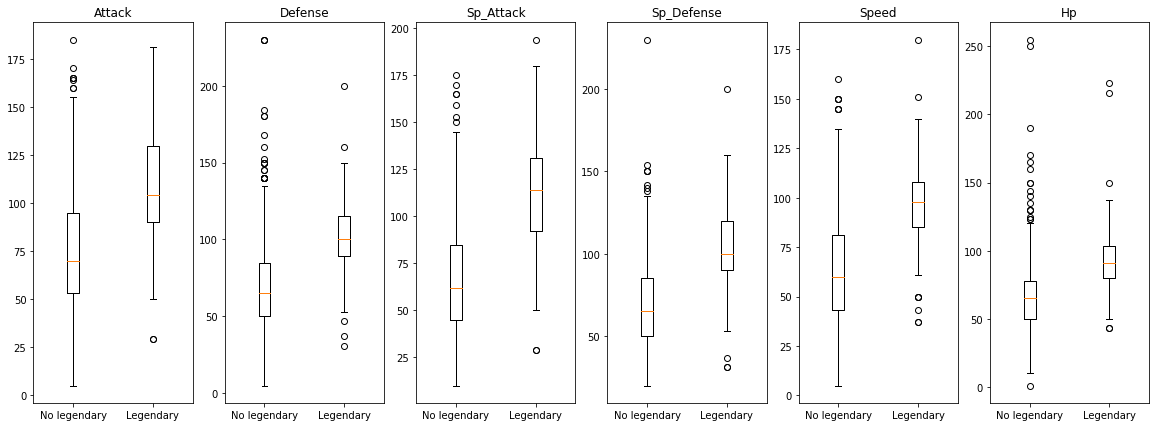

In [ ]:
# YOUR CODE HERE

#Separated Boxplots

# legend=Pokedex['is_legendary']==1
# no_legend=Pokedex['is_legendary']==0
# #Stats no legendary
# a,d,sp_a,sp_d,s,hp=Pokedex['attack'][no_legend],Pokedex['defense'][no_legend],Pokedex['sp_attack'][no_legend],Pokedex['sp_defense'][no_legend],Pokedex['speed'][no_legend],Pokedex['hp'][no_legend]

# #Stats legendary
# a_l,d_l,sp_a_l,sp_d_l,s_l,hp_l=Pokedex['attack'][legend],Pokedex['defense'][legend],Pokedex['sp_attack'][legend],Pokedex['sp_defense'][legend],Pokedex['speed'][legend],Pokedex['hp'][legend]

# attack = np.array([a,a_l],dtype='object')
# defense = np.array([d,d_l],dtype='object')
# sp_attack = np.array([sp_a,sp_a_l],dtype='object')
# sp_defense = np.array([sp_d,sp_d_l],dtype='object')
# speed = np.array([s,s_l],dtype='object')
# hp = np.array([hp,hp_l],dtype='object')


# ticks=['No legendary', 'Legendary']

# plt.figure(figsize=(20,7))

# plt.subplot(1,6,1)
# plt.boxplot(attack)
# plt.xticks((1,2),ticks)
# plt.title("Attack")

# plt.subplot(1,6,2)
# plt.boxplot(defense)
# plt.xticks((1,2),ticks)
# plt.title("Defense")

# plt.subplot(1,6,3)
# plt.boxplot(sp_attack)
# plt.xticks((1,2),ticks)
# plt.title("Sp_Attack")

# plt.subplot(1,6,4)
# plt.boxplot(sp_defense)
# plt.xticks((1,2),ticks)
# plt.title("Sp_Defense")

# plt.subplot(1,6,5)
# plt.boxplot(speed)
# plt.xticks((1,2),ticks)
# plt.title("Speed")

# plt.subplot(1,6,6)
# plt.boxplot(hp)
# plt.xticks((1,2),ticks)
# plt.title("Hp")

#plt.show()

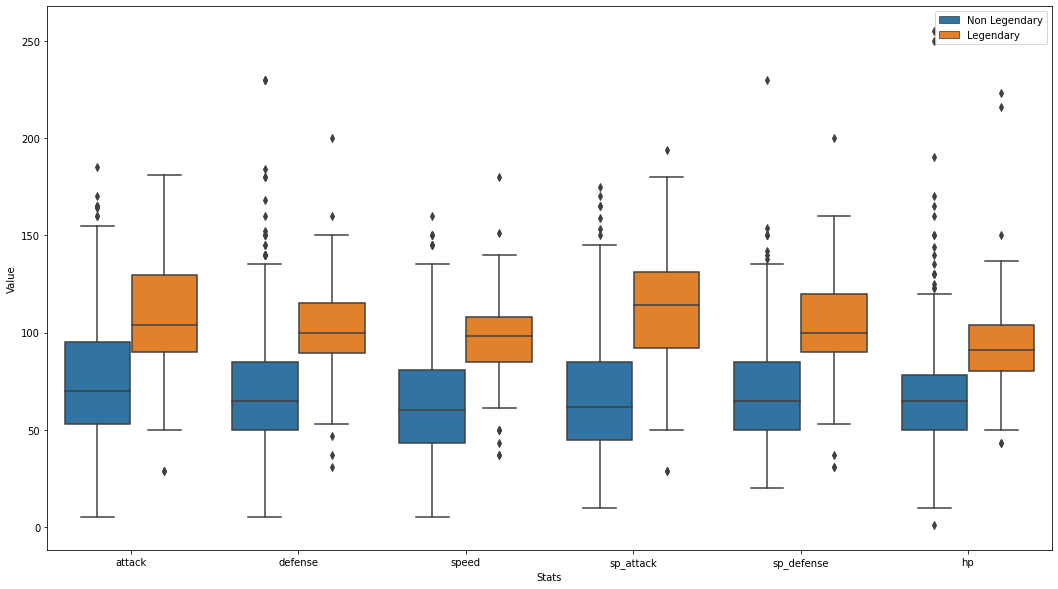

In [14]:
from posixpath import islink
data_fight = Pokedex[['attack','defense', 'speed','sp_attack', 'sp_defense', 'hp']]

#Managing the data
isl = list(Pokedex['is_legendary'])*6
isl = pd.Series(isl)
df_melted = data_fight.reset_index().melt(id_vars ='pokedex_number', var_name='Stats', value_name='Value')
df_melted['is_legendary'] = isl


#Plot
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=df_melted, x='Stats', y='Value',hue='is_legendary')
handles, _=ax.get_legend_handles_labels()
ax.legend(handles,['Non Legendary','Legendary'])
plt.show()

## 6. Create a training/test split
<p>As we might expect, legendary Pokémon outshine their ordinary counterparts in all fighter stats. Although we haven't formally tested a difference in means, the boxplots suggest a significant difference with respect to all six variables. Nonetheless, there are a number of outliers in each case, meaning that some legendary Pokémon are anomalously weak.</p>
<p>We have now explored all of the predictor variables we will use to explain what makes a Pokémon legendary. Before fitting our model, we will split the <code>pokedex</code> into a training set (<code>pokedex_train</code>) and a test set (<code>pokedex_test</code>). Follow a 80%-20% split. This will allow us to test the model on unseen data.</p>

In [15]:
Pokedex.columns

Index(['name', 'attack', 'defense', 'height_m', 'hp', 'percentage_male',
       'sp_attack', 'sp_defense', 'speed', 'type', 'weight_kg', 'generation',
       'is_legendary'],
      dtype='object')

In [16]:
#Preparing data

from sklearn.preprocessing import OneHotEncoder
y = Pokedex['is_legendary']
x = Pokedex.drop(columns = ['name','is_legendary','percentage_male','generation'])

#Transform 'type' data in numbers

encoder = OneHotEncoder()

columns = encoder.fit_transform(x[['type']]).toarray()
types_names = encoder.categories_[0]
x[types_names] = columns
x.drop(['type'],inplace = True,axis=1)


#Change Nan values
median = x["weight_kg"].median()
x["weight_kg"].fillna(median, inplace=True)
median1 = x["height_m"].median()
x["height_m"].fillna(median1, inplace=True)

display(x)

,attack,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,bug,dark,...,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,49,49,0.7,45,65,65,45,6.9,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,63,1.0,60,80,80,60,13.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100,123,2.0,80,122,120,80,100.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52,43,0.6,39,60,50,65,8.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,64,58,1.1,58,80,65,80,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,101,103,9.2,97,107,101,61,999.9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
798,181,131,0.3,59,59,31,109,0.1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,101,53,5.5,223,97,53,43,888.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## 7. Fit a decision tree (1 point)
<p>Now we have our training and test sets, we can go about building our classifier. But before we fit a random forest, we will fit a simple <strong>classification decision tree</strong>. This will give us a baseline fit against which to compare the results of the random forest, as well as an informative graphical representation of the model.</p>

I warn you that you will find a technical problem if you just estimate your tree using the data as-is... What might be going on?

Remember to plot your tree!

In [18]:
# YOUR CODE HERE
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=1812,max_depth=4)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1812)

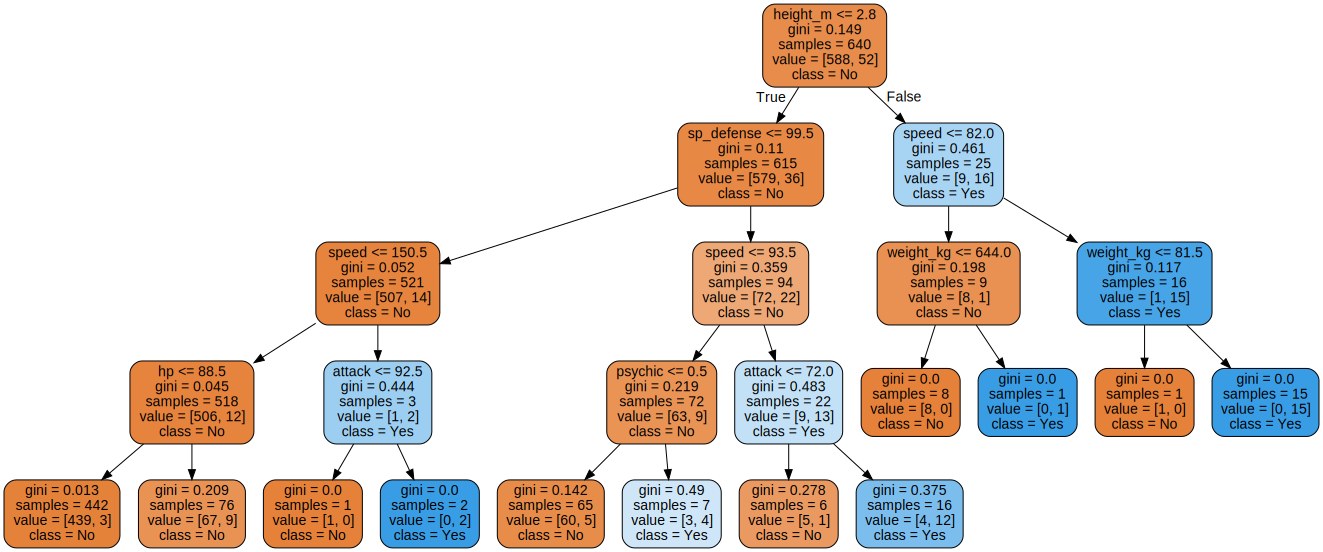

In [19]:
from pathlib import Path

IMAGES_PATH = Path() #/ "images" / "decision_trees"


from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "Pokedex_tree.dot"),  
        feature_names=x_train.columns,
        class_names=["No",'Yes'],
        rounded=True,
        filled=True
    )

from graphviz import Source

Source.from_file(IMAGES_PATH / "Pokedex_tree.dot")

Please, provide a comprehensive explanation of your tree. Feel free to support it with information extracted from the tree. Give also an assessment of the goodness-of-fit of the tree.

The decision tree looks at all the possible variables and decides that in this case the one that best separates the information is the variable height_m, with a threshold of 2.8m. This separates the data space into two regions. When predicting, if it is true that the pokemon has height_m less than or equal to 2.8 it will go to one of the regions and if not to the other.

If there were no more decision nodes, the answer of the tree would be the probability of being legendary in each of the cases (remember that the is_legendary variable is binary).

In this case we have a depth of 4, so we have more steps in which the algorithm is repeated to find the variable that best separates the data, in terms of the gini criterion. 

For the assessment of the goodness of fit We will use the AUC Score:

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

scores_tree = cross_val_predict(tree_clf, x_test,y_test, cv=3,method='predict_proba')
y_scores = scores_tree[:,1]
a = roc_auc_score(y_test, y_scores)
print('Accuracy Decision Tree:',a)

Accuracy Decision Tree: 0.6905594405594405


## 8. Fit a random forest (1 point)
<p>Decision trees are unstable and sensitive to small variations in the data. It therefore makes sense to fit a <strong>random forest</strong> – an ensemble method that averages over several decision trees all at once. This should give us a more robust model that classifies Pokémon with greater accuracy.</p>

In [21]:
# YOUR CODE HERE

from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier(random_state=1812,n_estimators=1000)
rf_clf.fit(x_train, y_train)

scores_rf = cross_val_predict(rf_clf, x_test,y_test, cv=3,method='predict_proba')
y_scores_rf=scores_rf[:,1]
print('Accuracy Random Forest:',roc_auc_score(y_test, y_scores_rf))


Accuracy Random Forest: 0.9324009324009325


## 9. Assess model fit (1 point)
First, assess how good is this model.

<p>Now, in order to allow direct comparison with the decision tree, we will plot the <strong>ROC curves</strong> for both models, which will visualize their true positive rate (TPR) and false positive rate (FPR) respectively.</p>

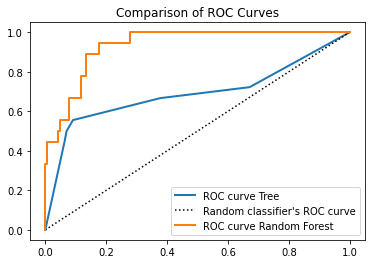

In [22]:
# YOUR CODE HERE
from sklearn.metrics import roc_curve, auc

fpr_T, tpr_T, thresholds_T = roc_curve(y_test, y_scores)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_scores_rf)
fpr_RF

plt.plot(fpr_T, tpr_T, linewidth=2, label="ROC curve Tree")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot(fpr_RF, tpr_RF, linewidth=2, label="ROC curve Random Forest")
plt.title('Comparison of ROC Curves')
plt.legend()

Which model is better?

 Random Forest is better as we see previously with the scores.

## 10. Analyze variable importance (0.25 points)
<p>It's clear from the ROC curves that the Random Forest is a substantially better model, boasting an AUC of **** % versus the Random Classifier's **** %. When calculating variable importance, it makes sense to do so with the best model available, so we'll use the Random Forest for the final part of our analysis.</p>


In [23]:
R=[]
for score, name in zip(rf_clf.feature_importances_, x.columns):
  R.append((round(score, 2), name))
R = np.array(R)
R_sort = R[R[:,0].argsort()[::-1]]
print(R_sort)

[['0.14' 'speed']
 ['0.13' 'sp_attack']
 ['0.12' 'hp']
 ['0.12' 'weight_kg']
 ['0.11' 'height_m']
 ['0.1' 'sp_defense']
 ['0.08' 'attack']
 ['0.08' 'defense']
 ['0.03' 'psychic']
 ['0.01' 'steel']
 ['0.01' 'bug']
 ['0.01' 'dragon']
 ['0.01' 'electric']
 ['0.01' 'water']
 ['0.01' 'fire']
 ['0.01' 'flying']
 ['0.01' 'grass']
 ['0.01' 'rock']
 ['0.0' 'fighting']
 ['0.0' 'dark']
 ['0.0' 'ghost']
 ['0.0' 'ground']
 ['0.0' 'ice']
 ['0.0' 'normal']
 ['0.0' 'poison']
 ['0.0' 'fairy']]


## 11. Other classification methods (2.5 points)

Use some of the models you have learnt to perform the same classification task carried out above. Compare them all!

In [ ]:
# YOUR CODE HERE

#grid search and random search para el random forest
#svm también con grid search y random search





In [24]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_clf= LogisticRegression(random_state=1812, max_iter=1000)
LR_clf.fit(x_train, y_train)

scores_LR = cross_val_predict(LR_clf, x_test,y_test, cv=3,method='predict_proba')
y_scores_LR=scores_LR[:,1]
print('Accuracy Logistic Regression:',roc_auc_score(y_test, y_scores_LR))


Accuracy Logistic Regression: 0.8725718725718725


In [ ]:
#SVC
from sklearn.svm import SVC

SVC_clf= SVC(random_state=1812,probability=True)
SVC_clf.fit(x_train, y_train)

scores_SVC = cross_val_predict(SVC_clf, x_test,y_test, cv=3,method='predict_proba')
y_scores_SVC=scores_SVC[:,1]
print('Accuracy Support Vector Machine:',roc_auc_score(y_test, y_scores_SVC))

Accuracy Support Vector Machine: 0.891996891996892


In [ ]:
#Grid Search for Random forest
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30, 100, 500], 'max_features': [8, 14]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [100, 500], 'max_features': [8,12]},
  ]

forest_clf = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_RF = GridSearchCV(forest_clf, param_grid, cv=3,
                           scoring='roc_auc',
                           return_train_score=True)
grid_search_RF.fit(x_train, y_train)

scores_grid_search_RF = cross_val_predict(grid_search_RF, x_test,y_test, cv=3,method='predict_proba')
y_scores_grid_search_RF=scores_grid_search_RF[:,1]
print('Accuracy Random Forest with grid search:',roc_auc_score(y_test, y_scores_grid_search_RF))

Accuracy Random Forest with grid search: 0.9238539238539238


In [ ]:
#Grid Search for SVC
param_grid = [
    # try 3 combinations of hyperparameters
    {'max_iter': [300, 1000, 1500,3000]}
  ]

SVC_clf_G= SVC(random_state=1812,probability=True)
# train across 3 folds, that's a total of 9 rounds of training 
grid_search_SVC = GridSearchCV(SVC_clf_G, param_grid, cv=3,
                           scoring='roc_auc',
                           return_train_score=True)
grid_search_SVC.fit(x_train, y_train)

scores_grid_search_SVC = cross_val_predict(grid_search_SVC, x_test,y_test, cv=3,method='predict_proba')
y_scores_grid_search_SVC=scores_grid_search_SVC[:,1]
print('Accuracy SVC with grid search:',roc_auc_score(y_test, y_scores_grid_search_SVC))

Accuracy SVC with grid search: 0.891996891996892


In [ ]:
#Random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_clf_R = RandomForestClassifier(random_state=42)
rnd_search_RF = RandomizedSearchCV(forest_clf_R, param_distributions=param_distribs,
                                n_iter=10, cv=3, scoring='roc_auc', random_state=42)
rnd_search_RF.fit(x_train, y_train)

scores_random_search_RF = cross_val_predict(rnd_search_RF, x_test,y_test, cv=3,method='predict_proba')
y_scores_random_search_RF=scores_random_search_RF[:,1]
print('Accuracy Random Forest with random search:',roc_auc_score(y_test, y_scores_random_search_RF))

Accuracy Random Forest with random search: 0.871017871017871


## 12. Pokemoooooon, Ensemble!! (1.5 points)

Estimate an ensemble of all the methods above to provide an even better prediction

In [ ]:
# YOUR CODE HERE
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LR_clf),
        ('rf', rf_clf),
        ('svc', SVC_clf),
        ('rf_grid_search', grid_search_RF),
        ('svc_grid_search', grid_search_SVC),
        ('rf_random_search',rnd_search_RF)
        
    ]
)


voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=1812)),
                             ('rf',
                              RandomForestClassifier(n_estimators=1000,
                                                     random_state=1812)),
                             ('svc', SVC(probability=True, random_state=1812)),
                             ('rf_grid_search',
                              GridSearchCV(cv=3,
                                           estimator=RandomForestClassifier(random_state=42),
                                           param_grid=[{'max_features': [8, 14],
                                                        'n_estimators': [30,
                                                                         100,
                                                                         500...
                                           return_train_score

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(x_test, y_test))

lr = 0.9192546583850931
rf = 0.9254658385093167
svc = 0.9192546583850931
rf_grid_search = 0.9728049728049728
svc_grid_search = 0.9557109557109558
rf_random_search = 0.9753302253302253


In [ ]:
scores_voting_clf = voting_clf.score(x_test,y_test)
scores_voting_clf
print('Accuracy Voting Classifier:',scores_voting_clf)

0.9192546583850931

## 13. Conclusions (1 point)
Please, write here the conclusions of this wonderful study on legendary Pokémon. Think about it as a real report that you have to handle to your manager (or Pokémon trainer!)

`# YOUR TEXT HERE`

--- 

## Congratulations on completing your research into legendary Pokémon – Professor Oak is excited to share the findings! 
